<a href="https://colab.research.google.com/github/HwangHanJae/ml-definitive-guide-pratice/blob/main/classification/xgb_training.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# XGB(eXtra Gradient Boost)
### : 트리 기반의 앙상블 학습으로 분류에 있어서 일반적으로 뛰어난 성능을 가짐



## XGBoost의 주요 장점
- 뛰어난 예측 성능  
  - 일반적으로 분류와 회귀 영역에서 뛰어난 예측 성능을 발휘함
- GBM 대비 빠른 수행시간
  - 병렬수행 및 다양한 기능으로 GBM에 비해 빠른 성능을 보장
    - 랜덤포레스트와 같은 다른 알고리즘 보다는 빠르다는 의미는 아님
- 과적합 규재
  - GBM에 없는 과적합 규제 기능이 있어 좀 더 강한 내구성을 지님
- Tree pruning(나무 가지치기)
  - 일반적으로 GBM은 분할 시 분정 손실이 발생하면 분할을 더 이상 수행하지 않지만 이러한 방식도 자칫 지나치게 많은 분할을 발생할 수 있음
  - max_depth 파라미터로 분할 깊이를 조정하기도 하지만, tree pruning으로 더 이상 긍정 이득이 없는 분할을 가지치기해서 분할 수를 더 줄이는 추가적인 장점을 가짐
- 자체 내장된 교차 검증
  - 반복 수행시마다 내부적으로 학습/평가 데이터 세트에 대한 교차 검증을 수행해 최적화된 반복 수행 횟수를 가질 수 있음
  - 지정된 횟수가 아니라 교차 검증을 통해 평가 데이터 세트의 평가 값이 최적화 되면 반복을 중간에 멈출 수 있는 조기 중단 기능이 있음
- 결손값 자체 처리
  - 결손값을 자체 처리할 수 있는 기능을 가지고 있음

## 파이썬 래퍼 XGBoost 하이퍼 파라미터
### 주요 일반 파라미터
: 일반적으로 실행 시 스레드의 개수나 slient 모드 등의 선택을 위한 파라미터로서 디 default 파라미터 값을 바꾸는 경우는 거의 없음
- booster
  - gbtree(tree based model) 또는 gblinear(linear model)
    - defualt = 'gbtree'
- slient
  - default = 0
    - 출력 메세지를 나타내고 싶지 않을 경우 1로 변경
- nthread
  - CPU의 실행 스레드 개수를 조정
    - default는 전체 스레드를 사용
    - 멀티 코어/스레드 CPU 시스템에서 전체 CPU를 사용하지 않고 일부 CPU만을 사용해 ML 애플리케이션을 구동하는 경우에 변경

### 주요 부스터 파라미터
- eta
  - GBM에서의 학습률과 같은 파라미터, 0~1의 값을 지정하며 부스팅 스텝을 반복적으로 수행할 때 업데이트 되는 값
    - default = 0.3
    - 일반적으로 0.01~0.2 사이값을 선호함
- num_boost_rounds
  - GBM의 n_estimators와 같은 파라미터
- min_child_weight
  - GBM의 min_child_leaf와 유사함
    - default = 1
  - 과적합을 조절하기 위하여 사용
- gamma
  - 트리의 리프 노드를 추가적으로 나눌지 결정할 최소 손실 감소ㄱ 값
  - 해당 값보다 큰 손실(loss)이 감소된 경우 리프 노드를 분리함
  - 값이 클수록 과적함 감소 효과가 있음
- max_depth
  - 트리 기반의 max_depth와 같음
  - default = 6
    - 3~10 값을 적용함
    - 0을 지정하면 깊이의 제한이 없음
  - 값이 높으면 특정 피처 조건에 특화되어 룰 조건이 만드어지므로 과적합 가능성이 높아짐
- sub_sample
  - GBM의 subsample과 동일함
  - 트리가 커져서 과적합되는 것을 제어하기 위해 데이터를 샘플링하는 비율을 지정
  - default = 1
    - 0.5로 지정하면 전체 데이터의 절반을 트리에 생성하는데 사용
    - 일반적으로 0.5~1의 값을 사용
- colsample_bytree
   - GBM의 max_features와 유사함
   - 트리 생성에 필요한 피처(칼럼)을 임의로 샘플링하는데 사용함
   - 매우 많은 피처가 있는 경우 과적합을 조정하는데 적용
   - default = 1
- lambda
  - L2 규제 적용 값
  - 피처 개수가 많을 경우 적용을 검토함
  - 값이 클수록 과적합 감소 효과가 있음
  - default = 1
- alpha
  - L1 규제 적용 값
  - 피처 개수가 많을 경우 적용을 검토함
  - 값이 클수록 과적합 감소 효과가 있음
  - default = 0
- scale_pos_weight
  - 특정 값으로 치우친 비대칭한 클래스로 구성된 데이터 세트의 균형을 유지 하기 위한파라미터
  - default = 1

### 학습 태스크 파라미터
- objective
  - 최솟값을 가져야할 손실 함수를 정의함
  - 많은 유형의 손실함수를 사용할 수 있음
  - 주로 사용되는 손실함수는 이진분류인지 다중분류인지에 따라 달라짐
- binary:logistic
  - 이진 분류일때 적용
- multi:softmax
  - 다중 분류일때 적용함
  - 손실함수가 multi:softmax일 경우 레이블 클래스의 개수인 num_class 파라미터를 지정해줘야함
- multi:softprob
   - multi:softmax와 유사하나 개별 레이블 클래스의 해당되는 예측 확률을 반환
- eval_metric
  - 검증에 사용되는 함수를 정의
  - default은 회귀인 경우 rmse, 분류일경우 error
  - rmse : Root Mean Square Error
  - mae : Mean Absolute Error
  - logloss : Negative log-likehood
  - error : Binary classification error rate(0.5 threshold)
  - merror : Multiclass classification error rate
  - mlogloss : Multiclass logloss
  - auc : Area under the curve

#### 과적합문제가 심각하다면 고려해볼만 한것
- eta 값을 낮추기
  - eta 값을 낮출경우 num_round(또는 n_estimators)는 반대로 높여줘야 함
- max_depth 값을 낮추기
- min_child_weight 값을 높이기
- gamma 값을 높이기
- subsample, colsample_bytree 를 조정
  

## 파이썬 래퍼 XGBoost 적용 - 위스콘신 유방암 예측


In [3]:
import xgboost as xgb
from xgboost import plot_importance
import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

dataset = load_breast_cancer()
X_features = dataset.data
y_label = dataset.target

df = pd.DataFrame(data = X_features, columns = dataset.feature_names)
df["label"] = y_label
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [5]:
print(dataset.target_names)
print(df['label'].value_counts())

['malignant' 'benign']
1    357
0    212
Name: label, dtype: int64


양성 357개, 음성 212개로 구성되어있음

In [6]:
# 80/20으로 학습/테스트 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X_features, y_label, test_size=0.2, random_state=156)

print(X_train.shape,X_test.shape)

(455, 30) (114, 30)


파이썬 래퍼 XGBoost는 사이킷런과 차이가 여러가지가 있지만  
학습/테스트 데이터 세트를 위해 DMatrix를 생성한다  
DMatrix는 주로 넘파이 입력 파라미터를 받아서 만들어지는 XGBosst 전용 데이터 세트이다.  
주요 파라미터로는 data(피처데이터 세트), label(분류의 경우 레이블 데이터 세트, 회귀의 경우 숫자형인 종속값 데이터 세트)이다.   

In [7]:
dtrain = xgb.DMatrix(data=X_train, label=y_train)
dtest = xgb.DMatrix(data=X_test, label = y_test)

In [8]:
#파라미터 설정
#early_stoppings 파라미터를 수행하기 위해서는 
#eval_metric, objective 파라미터가 설정이 되어야 함
params = {
    "max_depth" : 3,
    "eta" : 0.1,
    "objective" : "binary:logistic",
    "eval_metric" : "logloss",
    "early_stoppings" : 100
}
num_rounds =400

#train 데이터 세트는 'train', evaluation(test) 데이터 세트는 'eval'로 명명
wlist = [(dtrain, "train"), (dtest, "eval")]

xgb_model = xgb.train(params=params, dtrain=dtrain, num_boost_round=num_rounds, evals=wlist)

[0]	train-logloss:0.609688	eval-logloss:0.61352
[1]	train-logloss:0.540803	eval-logloss:0.547843
[2]	train-logloss:0.483753	eval-logloss:0.494248
[3]	train-logloss:0.434457	eval-logloss:0.447986
[4]	train-logloss:0.39055	eval-logloss:0.409109
[5]	train-logloss:0.354146	eval-logloss:0.374977
[6]	train-logloss:0.321222	eval-logloss:0.345714
[7]	train-logloss:0.292593	eval-logloss:0.320529
[8]	train-logloss:0.267467	eval-logloss:0.29721
[9]	train-logloss:0.245153	eval-logloss:0.277991
[10]	train-logloss:0.225694	eval-logloss:0.260302
[11]	train-logloss:0.207938	eval-logloss:0.246037
[12]	train-logloss:0.192184	eval-logloss:0.231556
[13]	train-logloss:0.177916	eval-logloss:0.22005
[14]	train-logloss:0.165222	eval-logloss:0.208572
[15]	train-logloss:0.153622	eval-logloss:0.199993
[16]	train-logloss:0.14333	eval-logloss:0.190118
[17]	train-logloss:0.133985	eval-logloss:0.181818
[18]	train-logloss:0.125599	eval-logloss:0.174729
[19]	train-logloss:0.117286	eval-logloss:0.167657
[20]	train-logl

In [9]:
#파이썬 래퍼 xgb는 클래스를 반환하느 것이 아닌 확률을 반환
pred_probs = xgb_model.predict(dtest)
print("predict() 수행 결과 값을 10개만 표시, 예측 확률값으로 표시됨.")
print(np.round(pred_probs[:10],3))

#예측 확률이 0.5보다 크면 1, 그렇지 않으면 0으로 예측값 결정해 리스트 객체인 preds에 저장
preds = [1 if x > 0.5 else 0 for x in pred_probs]
print("예측값 10개만 표시 : ", preds[:10])

predict() 수행 결과 값을 10개만 표시, 예측 확률값으로 표시됨.
[0.95  0.003 0.9   0.086 0.993 1.    1.    0.999 0.998 0.   ]
예측값 10개만 표시 :  [1, 0, 1, 0, 1, 1, 1, 1, 1, 0]


In [10]:
from sklearn.metrics import precision_score, recall_score, confusion_matrix, accuracy_score, f1_score, roc_auc_score
from sklearn.preprocessing import Binarizer
def get_clf_eval(y_test, pred):
  confusion = confusion_matrix(y_test, pred)
  accuracy = accuracy_score(y_test, pred)
  precision = precision_score(y_test, pred)
  recall = recall_score(y_test, pred)
  f1 = f1_score(y_test, pred)
  roc_score = roc_auc_score(y_test, pred)
  print("오차 행렬")
  print(confusion)
  print(f"정확도 : {round(accuracy, 4)}, 정밀도 : {round(precision, 4)}, 재현율 : {round(recall, 4)}, F1 : {round(f1, 4)}, ROC AUC : {round(roc_score, 4)}")

get_clf_eval() 함수를 적용해 모델의 예측 선ㅇ을 평가

In [11]:
get_clf_eval(y_test, preds)

오차 행렬
[[35  2]
 [ 1 76]]
정확도 : 0.9737, 정밀도 : 0.9744, 재현율 : 0.987, F1 : 0.9806, ROC AUC : 0.9665


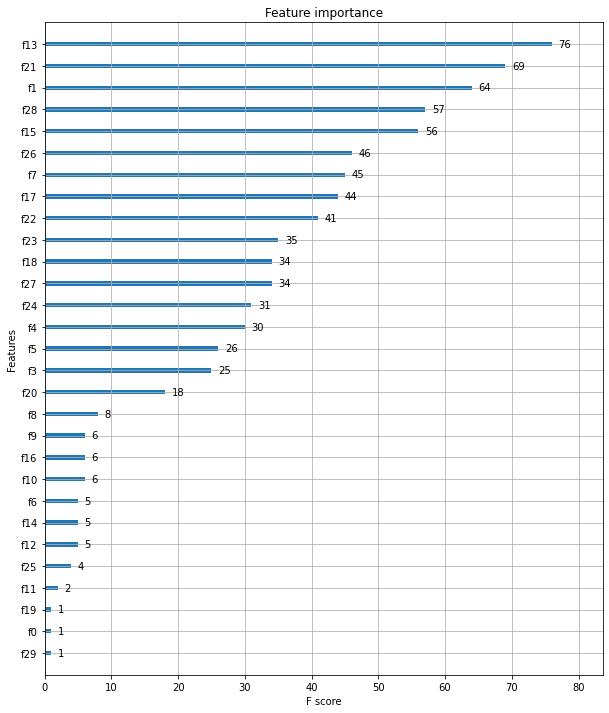

In [12]:
#피처의 중요도 시각화
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(10,12))
plot_importance(xgb_model, ax=ax)

## 사이킷런 래퍼 XGBoost 적용
### 파라미터
- eta -> learning_rate
- sub_sample -> subsample
- lambda -> reg_lambda
- alpha -> reg_alpha

In [14]:
from xgboost import XGBClassifier

xgb_wrapper = XGBClassifier(n_estimators=400, learning_rate=0.1, max_depth = 3)
xgb_wrapper.fit(X_train, y_train)
w_preds = xgb_wrapper.predict(X_test)

In [15]:
get_clf_eval(y_test, w_preds)

오차 행렬
[[35  2]
 [ 1 76]]
정확도 : 0.9737, 정밀도 : 0.9744, 재현율 : 0.987, F1 : 0.9806, ROC AUC : 0.9665


In [16]:
#조기 종료를 적용
xgb_wrapper = XGBClassifier(n_estimators=400, learning_rate=0.1, max_depth = 3)
evals = [(X_test, y_test)]
xgb_wrapper.fit(X_train, y_train, early_stopping_rounds=100, eval_metric='logloss',eval_set=evals, verbose=True)
ws100_preds = xgb_wrapper.predict(X_test)

[0]	validation_0-logloss:0.61352
Will train until validation_0-logloss hasn't improved in 100 rounds.
[1]	validation_0-logloss:0.547842
[2]	validation_0-logloss:0.494247
[3]	validation_0-logloss:0.447986
[4]	validation_0-logloss:0.409109
[5]	validation_0-logloss:0.374977
[6]	validation_0-logloss:0.345714
[7]	validation_0-logloss:0.320529
[8]	validation_0-logloss:0.29721
[9]	validation_0-logloss:0.277991
[10]	validation_0-logloss:0.260302
[11]	validation_0-logloss:0.246037
[12]	validation_0-logloss:0.231556
[13]	validation_0-logloss:0.22005
[14]	validation_0-logloss:0.208572
[15]	validation_0-logloss:0.199993
[16]	validation_0-logloss:0.190118
[17]	validation_0-logloss:0.181818
[18]	validation_0-logloss:0.174729
[19]	validation_0-logloss:0.167657
[20]	validation_0-logloss:0.158202
[21]	validation_0-logloss:0.154725
[22]	validation_0-logloss:0.148947
[23]	validation_0-logloss:0.143308
[24]	validation_0-logloss:0.136344
[25]	validation_0-logloss:0.132778
[26]	validation_0-logloss:0.127912

In [17]:
get_clf_eval(y_test, ws100_preds)

오차 행렬
[[34  3]
 [ 1 76]]
정확도 : 0.9649, 정밀도 : 0.962, 재현율 : 0.987, F1 : 0.9744, ROC AUC : 0.953
